### Strategic practice 1 (SP1)

I've borrowed the term 'Strategic Practice' from Prof. Joseph Blitzstein, who teaches a fantastic and deservedly famous class in Statistics at Harvard. The term 'Homework' just smacks of drudgery to me, and lacks the aspirational flavor I'm going for. 'Problems' are very important, and are opportunities for real growth, but I think of them more as being about creativity, and the deep integration of ideas and approaches across different domains. We're not quite there yet. 'Strategic practice' places the emphasis on gaining more familiarity with the fundamental skills and idioms that will be needed for more interesting problems later on.

### Setup and Background

You'll want to open up a Jupyter notebook and run the following block of code. This imports libraries you'll need to do SP1, as well as a toy dataset that we'll be using. 'Toy' is not meant disparagingly -- it just refers to the fact that the dataset is clean, not too huge, used often as a standard, and good for illustrating certain themes. 'Real' data is usually a gnarled and terrifying mess (at least at first), and aspires to be like a toy dataset ;-) 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
mpg = sns.load_dataset('mpg')

Let's take a quick look at what we've got: 

In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


As you can see, it's a pandas dataframe with information about cars. Each row is a particular car, and for each car we have numerical measurements about its fuel economy, weight, horsepower, etc. We also have some 'label-like' information for each car ('origin', 'name', etc). Let's get started! 

```{admonition} Question 1
:class: seealso
Create a markdown cell in your jupyter notebook. In that cell, write down two analyses or queries you think would be interesting to perform on this dataset (just in plain language, not code). Then, briefly describe what you think you might find, just based on intuition or prior knowledge.

For example: "It would be interesting to look at the relationship between _ and _. My hunch is that ____."
```

```{admonition} Question 2
:class: seealso
Which of the features in the mpg dataframe are *categorical variables*? (There may be more than one). Give a definition of a categorical variable. Enter your answer in a markdown cell. 
```

### Practice with Pandas: histograms, scatterplots, correlation

Did you ever wonder how many cylinders cars have, on average? Of course you have. The answer, at least according to this dataset, is 5.45 cylinders. That's a nice summary measure, but it doesn't tell us about the relative proportions of 4 vs. 5 vs. 6 vs. 8 cylinder cars. We might want to know about the **distribution** of cylinders, which we can get a better sense of through a **histogram**. 

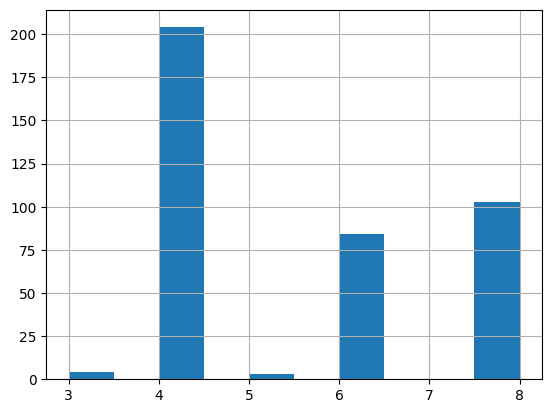

In [7]:
mpg['cylinders'].hist();

The histogram is reporting the number of cars with a certain number of cylinders. Looks like most cars have 4. Interestingly, it seems there are very very few cars with an odd number of cylinders.

```{admonition} Question 3
:class: seealso
 - Extract the 'weight' column from the mpg dataframe, and construct a histogram, as above. Interpret. 
 - Look at pandas documentation as needed to figure out how to change the number of bins in the histogram. Then, show another histogram of the same data, but with 60 bins instead of the default number of bins. What is evident about the data in this histogram that was harder to appreciate in your first histogram?
```

```{admonition} Question 4
:class: seealso
 - Make a new dataframe, called mpg2 that consists of only the following colummns of the mpg dataset: displacement, horsepower, weight, and mpg. You may need to consult an earlier chapter for an example where we grabbed multiple columns.
 - Create a 4 x 4 scatter matrix of mpg2 (consult the earlier notebook).
 - Looking at the scatter matrix, discuss which variables you think are positively correlated, and which you think are negatively correlated. 
```

```{admonition} Question 5
:class: seealso
 - Construct a correlation matrix for the dataframe mpg2 (see the earlier notebook). Explain the relationship between this matrix, and the scattermatrix you made above. 
```

In [36]:
# This snippet of code groups the cars by country of origin, and counts the total number of cars in each category:

mpg.groupby(by=['name']).count()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
amc ambassador brougham,1,1,1,1,1,1,1,1
amc ambassador dpl,1,1,1,1,1,1,1,1
amc ambassador sst,1,1,1,1,1,1,1,1
amc concord,2,2,2,2,2,2,2,2
amc concord d/l,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
vw dasher (diesel),1,1,1,1,1,1,1,1
vw pickup,1,1,1,1,1,1,1,1
vw rabbit,2,2,2,2,2,2,2,2


### QUESTION: 

Can you write a very similar statement to the above that groups the data not by car name, but by country of origin, and then finds the average of each feature? 

In [37]:
mpg.groupby(by=['origin']).mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
origin,,,,,,,
europe,27.891429,4.157143,109.142857,80.558824,2423.300000,16.787143,75.814286
japan,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038
usa,20.083534,6.248996,245.901606,119.048980,3361.931727,15.033735,75.610442


### QUESTION: 
Based on the query you just ran, do the data support the claim that, relative to Europeans, Americans like heavy cars, with lots of horsepower, and which get few miles to the gallon? 


### QUESTION

Look at [this example](https://seaborn.pydata.org/examples/grouped_barplot.html) from the Seaborn Gallery of how to make a 'category plot.' Make a similar category plot using the car data we've been working with, and show the relationship between miles per gallon and country of origin, broken down by year. 

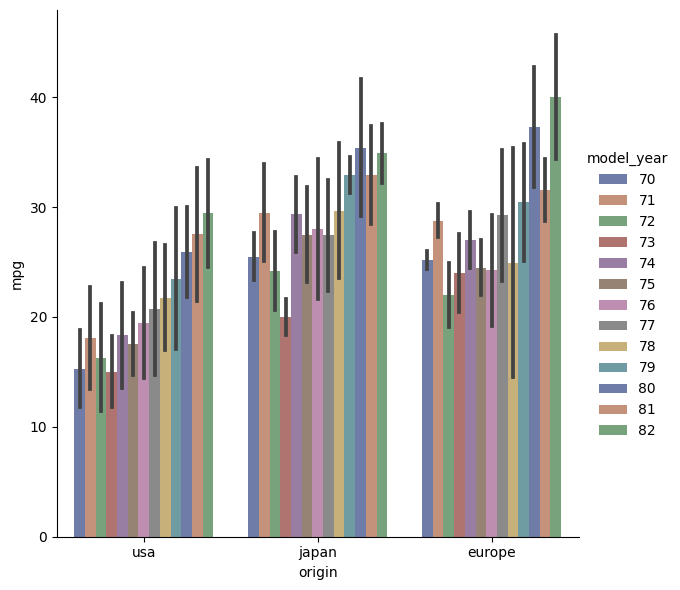

In [40]:
g = sns.catplot(
    data=mpg, kind="bar",
    x="origin", y="mpg", hue="model_year",
    errorbar="sd", palette="dark", alpha=.6, height=6)

In [41]:
### QUESTION 

Recall that pandas objects are 'dataframes'. We can pull out a column from a pandas dataframe as follows:

In [45]:
array = mpg[['horsepower', 'model_year']].to_numpy()

### QUESTION: 

Explain what this bit of code does: 


In [53]:
slice1 = array[4,:]

### QUESTION: 
Explain what this bit of code does: 

In [54]:
slice2 = array[:,1]

# QUESTION: 

Use the numpy function, where(), to find the indices of all cars that were made after 1974. 

In [57]:
index = np.where(slice2 > 74)

In [58]:
index

(array([152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
        165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
        178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
        191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
        204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
        217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
        230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
        243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255,
        256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268,
        269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281,
        282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294,
        295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307,
        308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320,
        321, 322, 323, 324, 325, 326, 327, 328, 329